In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D,Flatten,BatchNormalization, Dropout

2024-02-15 15:35:42.219966: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-15 15:35:42.220061: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-15 15:35:42.375663: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
# generators (useful to process large amount of data)

train_ds = keras.utils.image_dataset_from_directory(
    directory = "/kaggle/input/d/salader/dogs-vs-cats/train",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256)
    )

validation_ds = keras.utils.image_dataset_from_directory(
    directory = "/kaggle/input/d/salader/dogs-vs-cats/test",
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256)
    )

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [3]:
# Normalize
def process(image, label):
    image = tf.cast(image/255. , tf.float32)
    return image, label

    train_ds = train_ds.map(process)
    validation_ds = validation_ds.map(process)

In [4]:
# Create CNN model

model = Sequential()

model.add(Conv2D(32, kernel_size = (3,3), padding = 'valid', activation = 'relu', input_shape = (256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid'))

model.add(Conv2D(64, kernel_size = (3,3), padding = 'valid', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid'))

model.add(Conv2D(128, kernel_size = (3,3), padding = 'valid', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid'))

model.add(Flatten())

model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.15))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.15))
model.add(Dense(1, activation = 'sigmoid'))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [6]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [7]:
history = model.fit(train_ds, epochs = 25, validation_data = validation_ds)

Epoch 1/25


I0000 00:00:1708011380.155488      91 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


625/625 [==============================] - 73s 101ms/step - loss: 1.5605 - accuracy: 0.5518 - val_loss: 0.6637 - val_accuracy: 0.5880
Epoch 2/25
625/625 [==============================] - 57s 91ms/step - loss: 0.6547 - accuracy: 0.6060 - val_loss: 0.6892 - val_accuracy: 0.6304
Epoch 3/25
625/625 [==============================] - 58s 92ms/step - loss: 0.6216 - accuracy: 0.6506 - val_loss: 0.5847 - val_accuracy: 0.6834
Epoch 4/25
625/625 [==============================] - 58s 93ms/step - loss: 0.5679 - accuracy: 0.6932 - val_loss: 0.5274 - val_accuracy: 0.7224
Epoch 5/25
625/625 [==============================] - 58s 92ms/step - loss: 0.4959 - accuracy: 0.7358 - val_loss: 0.5695 - val_accuracy: 0.7092
Epoch 6/25
625/625 [==============================] - 58s 92ms/step - loss: 0.4473 - accuracy: 0.7645 - val_loss: 0.7729 - val_accuracy: 0.6908
Epoch 7/25
625/625 [==============================] - 58s 92ms/step - loss: 0.4011 - accuracy: 0.7868 - val_loss: 0.4613 - val_accuracy: 0.7858
Ep

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

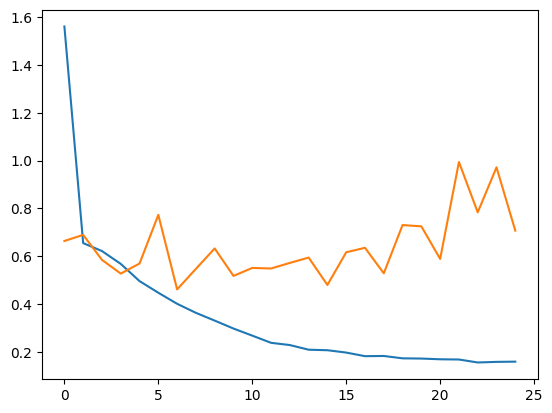

In [9]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

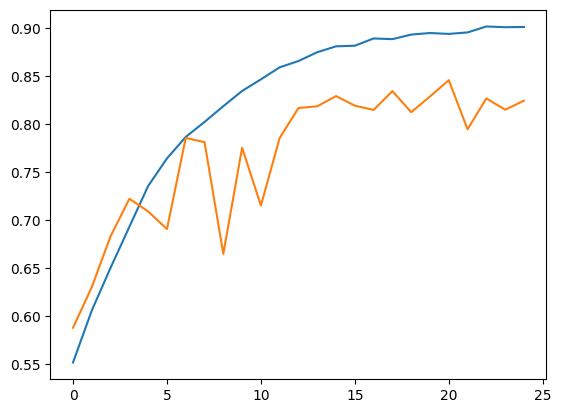

In [10]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])